In [1]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing the dataset
dataset_train=pd.read_csv("Train_UWu5bXk.csv")
dataset_test=pd.read_csv("Test_u94Q5KV.csv")

In [75]:
dataset_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# DATA PREPROCESSING

In [2]:
#Two different dataset are given for test and train. Therefore concatinating them for data preprocessing
dataset=pd.concat([dataset_train,dataset_test], axis=0,ignore_index=True) #axis=0 adds the other dataset to the bottem of other dataset

#Separating the dependent variable "y" from the dataset
x=dataset.iloc[:,dataset.columns!='Item_Outlet_Sales'] #iloc: integer location
y=dataset.loc[:,['Item_Outlet_Sales']] 
#import statistics
#statistics.mean(dataset['Item_Visibility'])

C:\Users\banak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
dataset.head()
#Item Identifier,Outlet_Identifier might be useless

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.000000        19.20   
4              Household         0.000000         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999            OUT049               Tier 1   
3                       1998            OUT010               Tier 3   
4                       1987            OUT013               Tier 3   

  Outlet_Size        Outlet_Type  
0      Medium  Supermarket Type1  
1      Medium  Supermarket Type2  
2      Medium  Supermarket Type1  
3         NaN      Grocery Store  
4        High  Supermarket Type1

In [4]:
#Data Exploration
dataset.describe()

Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000

In [5]:
dataset['Item_Visibility'].value_counts()
# There are a total of 879 items with item visibility = 0. 
# 2 possibilities: The item may not be present in that store (or) They are missing values. 
# 2 ways to settle this issue: Remove that item (or) replace with mean 

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [6]:
dataset.corr()

Item_MRP  Item_Outlet_Sales  Item_Visibility  \
Item_MRP                   1.000000           0.567574        -0.006351   
Item_Outlet_Sales          0.567574           1.000000        -0.128625   
Item_Visibility           -0.006351          -0.128625         1.000000   
Item_Weight                0.036236           0.014123        -0.015901   
Outlet_Establishment_Year  0.000141          -0.049135        -0.083678   

                           Item_Weight  Outlet_Establishment_Year  
Item_MRP                      0.036236                   0.000141  
Item_Outlet_Sales             0.014123                  -0.049135  
Item_Visibility              -0.015901                  -0.083678  
Item_Weight                   1.000000                   0.000645  
Outlet_Establishment_Year     0.000645                   1.000000

In [7]:
# Exploring each categorical variable
dataset['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [8]:
sum(dataset['Item_Fat_Content'].isnull())

0

In [9]:
#Replacing LF and low fat with Low Fat and reg with Regular
dataset['Item_Fat_Content']=dataset['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])
dataset['Item_Fat_Content'].value_counts()
##########################################################################################################################
# 1st categorical variable is solved

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [10]:
print('number of missing values= %s'%(sum(dataset['Item_Type'].isnull())))
print('/n')
print(dataset['Item_Type'].value_counts())
##########################################################################################################################
#Nothing yet to solve for 2nd categorical variable.

number of missing values= 0
/n
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


In [11]:
print('number of missing values= %s'%(sum(dataset['Outlet_Location_Type'].isnull())))
print('/n')
dataset['Outlet_Location_Type'].value_counts() 
##########################################################################################################################
#Nothing yet to solve for 3rd categorical variable.

number of missing values= 0
/n


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [12]:
print('number of missing values= %s'%(sum(dataset['Outlet_Size'].isnull())))
print('/n')
dataset['Outlet_Size'].value_counts()

number of missing values= 4016
/n


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
#STEP-1
#Putting all null values separately
#Outlet_Size_Nulls=dataset.loc[dataset['Outlet_Size'].isnull()]
#STEP-2
#Putting all non-null values separately
#Outlet_Size_NotNulls=dataset.loc[dataset['Outlet_Size'].notnull()]
#STEP-3
#Outlet_Size_NotNulls.isnull().any()
#Item_Weight may not affect the Outlet_Size. Therefore dropping that column. 
#Outlet_Sales missing values are from test set. Therefore, removing that column too assuming that it have no affect on the Outlet_Size
#STEP-4
#Dropping the variables with missing values, which are assumed to have no effect on the Outlet_Size.
#Outlet_Size_NotNulls=Outlet_Size_NotNulls.drop(['Item_Weight'], axis=1)
#Outlet_Size_NotNulls=Outlet_Size_NotNulls.drop(['Item_Outlet_Sales'], axis=1)
# STEP-5 Creating matrix of variables
#Outlet_Size_NotNulls_x=Outlet_Size_NotNulls.loc[:,['Outlet_Location_Type','Outlet_Type']]
#Outlet_Size_NotNulls_y=Outlet_Size_NotNulls.loc[:,'Outlet_Size']
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_x=LabelEncoder()
#Outlet_Size_NotNulls_x['Outlet_Location_Type']=labelencoder_x.fit_transform(Outlet_Size_NotNulls_x['Outlet_Location_Type'])
#Outlet_Size_NotNulls_x['Outlet_Type']=labelencoder_x.fit_transform(Outlet_Size_NotNulls_x['Outlet_Type'])
#onehotencoder=OneHotEncoder()
#Outlet_Size_NotNulls_x=onehotencoder.fit_transform(Outlet_Size_NotNulls_x).toarray()
#labelencoder_y=LabelEncoder()
#Outlet_Size_NotNulls_y=labelencoder_y.fit_transform(Outlet_Size_NotNulls_y)
#from sklearn.model_selection import train_test_split
#Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_x_test,Outlet_Size_NotNulls_y_train,Outlet_Size_NotNulls_y_test=train_test_split(Outlet_Size_NotNulls_x,Outlet_Size_NotNulls_y,test_size=0.2,random_state=0)
# TRying KNN
#from sklearn.neighbors import KNeighborsClassifier
#KNNclassifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
#KNNclassifier.fit(Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_y_train)
#KNN_y_pred=KNNclassifier.predict(Outlet_Size_NotNulls_x_test)
#from sklearn.metrics import confusion_matrix
#Kcm=confusion_matrix(Outlet_Size_NotNulls_y_test, KNN_y_pred)
#Trying SVM
#from sklearn.svm import SVC
#SVMclassifier=SVC(kernel='rbf', random_state=0)
#SVMclassifier.fit(Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_y_train)
#SVM_y_pred=SVMclassifier.predict(Outlet_Size_NotNulls_x_test)
#SVM_cm=confusion_matrix(Outlet_Size_NotNulls_y_test, SVM_y_pred)
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression(random_state=0)
#classifier.fit(Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_y_train)
#y_pred=classifier.predict(Outlet_Size_NotNulls_x_test)
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(Outlet_Size_NotNulls_y_test, y_pred)
#labelencoder_y.inverse_transform(y_pred)
####################################################################################################
#dataset1=dataset.loc[dataset['Outlet_Size'].notnull()]
#all_cols= dataset.loc[:,['Outlet_Location_Type','Outlet_Type','Outlet_Size']]

#x_trn = dataset1.loc[:,['Outlet_Location_Type','Outlet_Type']]
#y_trn=dataset1['Outlet_Size']

#dataset2=dataset.loc[dataset['Outlet_Size'].isnull()]
#x_tst = dataset2.loc[:,['Outlet_Location_Type','Outlet_Type']]
#y_tst=dataset2['Outlet_Size']

In [14]:
#####---------WORKED------------######

# Filling the missing values in 'Outlet_Size' with the predicted values 
#Step-1: select only those variables that are assumed to have affect on 'Outlet_Size' prediction.
#Step-2: do OHE for the selected variables 
dummy =pd.concat([pd.get_dummies(dataset[['Outlet_Location_Type','Outlet_Type','Outlet_Identifier']]), dataset[['Item_Visibility']]], axis=1)
# Concatinating the 'Outlet_Size' to the selected variables dataset (dummy)
dummy=pd.concat([dummy,dataset['Outlet_Size']], axis=1)

In [15]:
#checking the datatypes of each variable after OHE
dummy.dtypes

Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifier_OUT046           uint8
Outlet_Identifier_OUT049           uint8
Item_Visibility                  float64
Outlet_Size                       object
dtype: object

In [16]:
# Step-3: separating the rows with 'NaN' values into two defferent datasets (NO_NAN and NAN) 
#from sklearn.preprocessing import LabelEncoder
# Dataset without NaN values.
NO_NAN = dummy.loc[dummy['Outlet_Size'].notnull()]
Input=NO_NAN.iloc[:,:-1]
Output=NO_NAN.iloc[:,-1]
#Output=pd.get_dummies(Output)

#labelencoder_x=LabelEncoder()
#Output=labelencoder_x.fit_transform(Output)

# Dataset with NaN values.
NAN =  dummy.loc[dummy['Outlet_Size'].isnull()]
ip = NAN.iloc[:,:-1]
op = NAN.iloc[:,-1]
#labelencoder_y=LabelEncoder()
#op=labelencoder_y.fit_transform(op)

# Step-4: seperating the NO_NAN dataset into train and test for testing if the predictions are correct or not
from sklearn.model_selection import train_test_split
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,test_size=0.2,random_state=0)



In [17]:
# Trying KNN
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNNclassifier.fit(Input_train,Output_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
# Predicted values of NO_NAN test set
KNN_y_pred=KNNclassifier.predict(Input_test)

In [19]:
# Unique values in prediction of test set
np.unique(KNN_y_pred)

array(['High', 'Medium', 'Small'], dtype=object)

In [20]:
# Unique values for the predictions of null values
np.unique(KNNclassifier.predict(ip))

array(['High', 'Medium', 'Small'], dtype=object)

In [21]:
# Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator = KNNclassifier, X=Input_train, y=Output_train, cv=10, n_jobs=-1)

In [22]:
accuracies

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# Confusion matrix to check the predictions for NO_NAN test set
from sklearn.metrics import confusion_matrix
Kcm=confusion_matrix(Output_test, KNN_y_pred)

In [24]:
Kcm

array([[280,   0,   0],
       [  0, 951,   0],
       [  0,   0, 807]], dtype=int64)

In [25]:
#For Train
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_1=LabelEncoder()
#labelencoder_2=LabelEncoder()
#dataset['Outlet_Location_Type']=labelencoder_1.fit_transform(dataset['Outlet_Location_Type'])
#dataset['Outlet_Type']=labelencoder_2.fit_transform(dataset['Outlet_Type'])
#onehotencoder_1=OneHotEncoder(categorical_features='all')
#dataset=onehotencoder_1.fit_transform(dataset).toarray()
#For Train
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_1=LabelEncoder()
#labelencoder_2=LabelEncoder()
#x_trn['Outlet_Location_Type']=labelencoder_1.fit_transform(x_trn['Outlet_Location_Type'])
#x_trn['Outlet_Type']=labelencoder_2.fit_transform(x_trn['Outlet_Type'])
#onehotencoder_1=OneHotEncoder(categorical_features='all')
#x_trn=onehotencoder_1.fit_transform(x_trn).toarray()
#labelencoder_3=LabelEncoder()
#y_trn=labelencoder_3.fit_transform(y_trn)
#x_trn=x_trn[:,1:] # Removing 1st column fot dummy variable trap
#For Test (NUll Values)
#labelencoder_4=LabelEncoder()
#labelencoder_5=LabelEncoder()
#x_tst['Outlet_Location_Type']=labelencoder_4.fit_transform(x_tst['Outlet_Location_Type'])
#x_tst['Outlet_Type']=labelencoder_5.fit_transform(x_tst['Outlet_Type'])

#onehotencoder_2=OneHotEncoder(categorical_features='all')
#x_tst=onehotencoder_2.fit_transform(x_tst).toarray()

#x_tst=x_tst[:,1:] 

In [26]:
dataset['Outlet_Size'][1]

'Medium'

In [27]:
#It did not work: Have to check the problem later.
#dataset['Outlet_Size'].fillna(0, inplace=True)
#for i in range(0,len(dataset)):
    #if dataset['Outlet_Size'][i]==0:
        
        #dataset['Outlet_Size'][i]=dataset['Outlet_Size'][i].replace(0, KNNclassifier.predict(dataset['Outlet_Size'][i]))

In [28]:
#FILLING THE NANs WITH THE PREDICTIONS.
#Putting all the predicted values for NaNs in a separate variable 'filler'
filler=KNNclassifier.predict(ip)

In [29]:
#Converting the array to a list 
filler=filler.tolist() # Converting an array into list 

In [30]:
# Frequency of each value in a list 
import collections
counter=collections.Counter(filler)
print(counter)

Counter({'Small': 3264, 'Medium': 495, 'High': 257})


In [31]:
len(filler)

4016

In [32]:
#To make sure that the number of predicted values for nulls and # of nulls are equal.
sum(dataset['Outlet_Size'].isnull())

4016

In [33]:
# FIlling all the NaN values with the predicted values.
dataset.loc[dataset.Outlet_Size.isnull(), 'Outlet_Size'] = filler

In [34]:
#Replacing the missing values with mode. 
#import statistics
#dataset['Outlet_Size']=dataset['Outlet_Size'].fillna(statistics.mode(dataset['Outlet_Size']))
##################### 4th categorical variable si kind of solved 

In [35]:
dataset['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [36]:
# Total number of missing values in each feature
sum(dataset['Outlet_Type'].isnull())

0

In [37]:
#NUll value check 
sum(dataset['Item_MRP'].isnull())

0

In [38]:
#Outlier check
import seaborn as sns

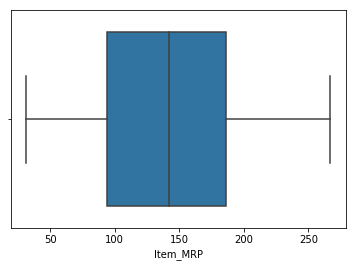

In [39]:
sns.boxplot(dataset['Item_MRP'])

In [40]:
sum(dataset['Item_Visibility'].isnull())

0

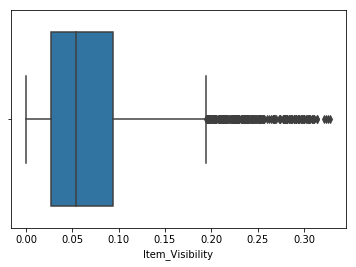

In [41]:
sns.boxplot(dataset['Item_Visibility'])

In [42]:
#Replacing the 0 visibity with the mean visibility
import statistics
statistics.mean(dataset['Item_Visibility'])
dataset['Item_Visibility']=dataset['Item_Visibility'].replace(0,0.06595278007399324)

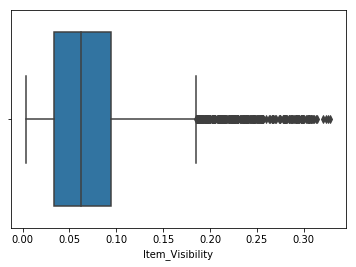

In [43]:
sns.boxplot(dataset['Item_Visibility'])

In [44]:
# null value check
sum(dataset['Item_Weight'].isnull())

2439

In [45]:
np.nanmean(dataset['Item_Weight'])

12.792854228644284

In [46]:
# Filling the missing values with the mean of the dataset.
dataset['Item_Weight']=dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())

In [47]:
sum(dataset['Item_Weight'].isnull())

0

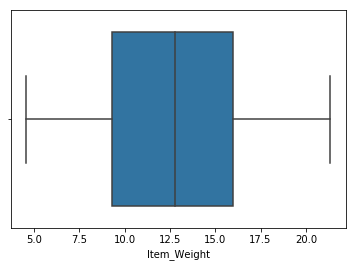

In [48]:
# Outlier check 
sns.boxplot(dataset['Item_Weight'])

In [49]:
#Considering the entire dataset 
    # Datapreprocessing : dummies for categorical variables
    # Feature Engineering : removing the unwanted columns and combining the columns and few modifications in the dataset. 
    # Model building : The output is the regression problem. So try all the regression models and check for accuracy metrics. 
    # Cross Validation: Do k-fold first then try grid search and XGBoost.  


# FEATURE ENGINEERING

In [50]:
dataset.head()

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.065953        19.20   
4              Household         0.065953         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999            OUT049               Tier 1   
3                       1998            OUT010               Tier 3   
4                       1987            OUT013               Tier 3   

  Outlet_Size        Outlet_Type  
0      Medium  Supermarket Type1  
1      Medium  Supermarket Type2  
2      Medium  Supermarket Type1  
3        High      Grocery Store  
4        High  Supermarket Type1

In [51]:
# Outlet_Establishment_Year can be replace by the number of years.  
dataset['Outlet_Establishment_Year']=2013-dataset['Outlet_Establishment_Year']


In [52]:
dataset.head(200)

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0            Low Fat           FDA15  249.8092          3735.1380   
1            Regular           DRC01   48.2692           443.4228   
2            Low Fat           FDN15  141.6180          2097.2700   
3            Regular           FDX07  182.0950           732.3800   
4            Low Fat           NCD19   53.8614           994.7052   
5            Regular           FDP36   51.4008           556.6088   
6            Regular           FDO10   57.6588           343.5528   
7            Low Fat           FDP10  107.7622          4022.7636   
8            Regular           FDH17   96.9726          1076.5986   
9            Regular           FDU28  187.8214          4710.5350   
10           Low Fat           FDY07   45.5402          1516.0266   
11           Regular           FDA03  144.1102          2187.1530   
12           Regular           FDX32  145.4786          1589.2646   
13           Regular           FDS46  119.6782          2145.2076   
14           Low Fat           FDF32  196.4426          1977.4260   
15           Regular           FDP49   56.3614          1547.3192   
16           Low Fat           NCB42  115.3492          1621.8888   
17           Regular           FDP49   54.3614           718.3982   
18           Low Fat           DRI11  113.2834          2303.6680   
19           Low Fat           FDU02  230.5352          2748.4224   
20           Regular           FDN22  250.8724          3775.0860   
21           Regular           FDW12  144.5444          4064.0432   
22           Low Fat           NCB30  196.5084          1587.2672   
23           Low Fat           FDC37  107.6938           214.3876   
24           Regular           FDR28  165.0210          4078.0250   
25           Low Fat           NCD06   45.9060           838.9080   
26           Regular           FDV10   42.3112          1065.2800   
27           Low Fat           DRJ59   39.1164           308.9312   
28           Regular           FDE51   45.5086           178.4344   
29           Regular           FDC14   43.6454           125.8362   
..               ...             ...       ...                ...   
170          Low Fat           NCM43  164.8210          2120.5730   
171          Low Fat           FDK44  173.0738          3823.0236   
172          Regular           FDM15  151.4366          1360.2294   
173          Regular           FDS31  178.8318          3969.4996   
174          Low Fat           FDI32  115.1834           345.5502   
175          Low Fat           FDR47  196.5794           585.2382   
176          Regular           FDB35   92.6804          1010.6844   
177          Low Fat           NCU05   81.4618           161.1236   
178          Regular           DRY23   42.1112            42.6112   
179          Low Fat           FDO24  157.4604          3010.7476   
180          Regular           FDQ28  153.0656          6024.1584   
181          Low Fat           FDV39  198.1426           988.7130   
182          Low Fat           NCO17  117.9440           239.6880   
183          Regular           FDU50  112.8176          1374.2112   
184          Regular           FDT12  226.8062          4739.8302   
185          Regular           FDK58  100.0016          1012.0160   
186          Regular           FDO08  165.7526           657.8104   
187          Low Fat           NCW29  130.4310           778.9860   
188          Regular           FDE04  179.7660          2336.9580   
189          Low Fat           NCB19   85.0882          2233.0932   
190          Low Fat           FDV15  103.9648          1661.8368   
191          Regular           FDL58  264.7568          4745.8224   
192          Regular           FDA08  164.1526          3124.5994   
193          Low Fat           FDT43   50.1324           467.3916   
194          Low Fat           NCX06  182.5976          5070.7328   
195          Low Fat           FDT20   37.6164           540.6296   
19

In [53]:
dataset

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0              Low Fat           FDA15  249.8092          3735.1380   
1              Regular           DRC01   48.2692           443.4228   
2              Low Fat           FDN15  141.6180          2097.2700   
3              Regular           FDX07  182.0950           732.3800   
4              Low Fat           NCD19   53.8614           994.7052   
5              Regular           FDP36   51.4008           556.6088   
6              Regular           FDO10   57.6588           343.5528   
7              Low Fat           FDP10  107.7622          4022.7636   
8              Regular           FDH17   96.9726          1076.5986   
9              Regular           FDU28  187.8214          4710.5350   
10             Low Fat           FDY07   45.5402          1516.0266   
11             Regular           FDA03  144.1102          2187.1530   
12             Regular           FDX32  145.4786          1589.2646   
13             Regular           FDS46  119.6782          2145.2076   
14             Low Fat           FDF32  196.4426          1977.4260   
15             Regular           FDP49   56.3614          1547.3192   
16             Low Fat           NCB42  115.3492          1621.8888   
17             Regular           FDP49   54.3614           718.3982   
18             Low Fat           DRI11  113.2834          2303.6680   
19             Low Fat           FDU02  230.5352          2748.4224   
20             Regular           FDN22  250.8724          3775.0860   
21             Regular           FDW12  144.5444          4064.0432   
22             Low Fat           NCB30  196.5084          1587.2672   
23             Low Fat           FDC37  107.6938           214.3876   
24             Regular           FDR28  165.0210          4078.0250   
25             Low Fat           NCD06   45.9060           838.9080   
26             Regular           FDV10   42.3112          1065.2800   
27             Low Fat           DRJ59   39.1164           308.9312   
28             Regular           FDE51   45.5086           178.4344   
29             Regular           FDC14   43.6454           125.8362   
...                ...             ...       ...                ...   
14174          Regular           FDD23  186.1898                NaN   
14175          Low Fat           FDP32  126.7678                NaN   
14176          Regular           FDO31   80.2960                NaN   
14177          Low Fat           FDQ57  144.5760                NaN   
14178          Regular           FDX32  143.6786                NaN   
14179          Low Fat           FDC39  207.8296                NaN   
14180          Low Fat           FDU55  261.3278                NaN   
14181          Low Fat           FDL45  123.4704                NaN   
14182          Low Fat           DRK37  188.8530                NaN   
14183          Low Fat           FDK22  215.3850                NaN   
14184          Low Fat           DRG37  155.7972                NaN   
14185          Low Fat           FDK22  214.3850                NaN   
14186          Low Fat           DRH36   72.8696                NaN   
14187          Regular           DRC36  173.4054                NaN   
14188          Low Fat           DRE03   46.0718                NaN   
14189          Regular           FDF34  196.9084                NaN   
14190          Low Fat           FDZ22   82.1250                NaN   
14191          Low Fat           FDC44  115.1518                NaN   
14192          Low Fat           FDN31  188.0530                NaN   
14193          Regular           FDO03  229.4352                NaN   
14194          Regular           FDA01   59.5904                NaN   
14195          Low Fat           NCH42  231.1010                NaN   
14196          Low Fat           FDF46  116.0834                NaN   
14197          Low Fat           DRL35   43.2770                NaN   
14198          Regular        

In [54]:
# Seems like the Outlet_Identifier is of no use in the analysis. Therefore, dropping that column for now
dataset=dataset.drop(['Outlet_Identifier'], axis=1)

In [55]:
dataset.head()

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.065953        19.20   
4              Household         0.065953         8.93   

   Outlet_Establishment_Year Outlet_Location_Type Outlet_Size  \
0                         14               Tier 1      Medium   
1                          4               Tier 3      Medium   
2                         14               Tier 1      Medium   
3                         15               Tier 3        High   
4                         26               Tier 3        High   

         Outlet_Type  
0  Supermarket Type1  
1  Supermarket Type2  
2  Supermarket Type1  
3      Grocery Store  
4  Supermarket Type1

In [56]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [58]:
dataset['Item_Type'].head(10)

0                    Dairy
1              Soft Drinks
2                     Meat
3    Fruits and Vegetables
4                Household
5             Baking Goods
6              Snack Foods
7              Snack Foods
8             Frozen Foods
9             Frozen Foods
Name: Item_Type, dtype: object

In [70]:
dataset['Item_Type']=dataset['Item_Type'].replace(['Dairy','Soft Drinks','Hard Drinks'],['Class 1','Class 1','Class 1'])
dataset['Item_Type']=dataset['Item_Type'].replace(['Snack Foods','Breads','Breakfast','Baking Goods'],['Class 2','Class 2','Class 2','Class 2'])
dataset['Item_Type']=dataset['Item_Type'].replace(['Fruits and Vegetables','Starchy Foods'],['Class 3','Class 3'])
dataset['Item_Type']=dataset['Item_Type'].replace(['Household','Health and Hygiene','Others '],['Class 4','Class 4','Class 4'])
dataset['Item_Type']=dataset['Item_Type'].replace(['Meat','Seafood','Frozen Foods','Canned'],['Class 5','Class 5','Class 5','Class 5'])

In [72]:
dataset.head()

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales Item_Type  \
0          Low Fat           FDA15  249.8092          3735.1380   Class 1   
1          Regular           DRC01   48.2692           443.4228   Class 1   
2          Low Fat           FDN15  141.6180          2097.2700   Class 5   
3          Regular           FDX07  182.0950           732.3800   Class 3   
4          Low Fat           NCD19   53.8614           994.7052   Class 4   

   Item_Visibility  Item_Weight  Outlet_Establishment_Year  \
0         0.016047         9.30                         14   
1         0.019278         5.92                          4   
2         0.016760        17.50                         14   
3         0.065953        19.20                         15   
4         0.065953         8.93                         26   

  Outlet_Location_Type Outlet_Size        Outlet_Type  
0               Tier 1      Medium  Supermarket Type1  
1               Tier 3      Medium  Supermarket Type2  
2               Tier 1      Medium  Supermarket Type1  
3               Tier 3        High      Grocery Store  
4               Tier 3        High  Supermarket Type1

In [73]:
dataset.corr()

Item_MRP  Item_Outlet_Sales  Item_Visibility  \
Item_MRP                   1.000000           0.567574        -0.008790   
Item_Outlet_Sales          0.567574           1.000000        -0.134141   
Item_Visibility           -0.008790          -0.134141         1.000000   
Item_Weight                0.033002           0.011083        -0.015313   
Outlet_Establishment_Year -0.000141           0.049135         0.088598   

                           Item_Weight  Outlet_Establishment_Year  
Item_MRP                      0.033002                  -0.000141  
Item_Outlet_Sales             0.011083                   0.049135  
Item_Visibility              -0.015313                   0.088598  
Item_Weight                   1.000000                  -0.000462  
Outlet_Establishment_Year    -0.000462                   1.000000

In [74]:
dataset

Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales Item_Type  \
0              Low Fat           FDA15  249.8092          3735.1380   Class 1   
1              Regular           DRC01   48.2692           443.4228   Class 1   
2              Low Fat           FDN15  141.6180          2097.2700   Class 5   
3              Regular           FDX07  182.0950           732.3800   Class 3   
4              Low Fat           NCD19   53.8614           994.7052   Class 4   
5              Regular           FDP36   51.4008           556.6088   Class 2   
6              Regular           FDO10   57.6588           343.5528   Class 2   
7              Low Fat           FDP10  107.7622          4022.7636   Class 2   
8              Regular           FDH17   96.9726          1076.5986   Class 5   
9              Regular           FDU28  187.8214          4710.5350   Class 5   
10             Low Fat           FDY07   45.5402          1516.0266   Class 3   
11             Regular           FDA03  144.1102          2187.1530   Class 1   
12             Regular           FDX32  145.4786          1589.2646   Class 3   
13             Regular           FDS46  119.6782          2145.2076   Class 2   
14             Low Fat           FDF32  196.4426          1977.4260   Class 3   
15             Regular           FDP49   56.3614          1547.3192   Class 2   
16             Low Fat           NCB42  115.3492          1621.8888   Class 4   
17             Regular           FDP49   54.3614           718.3982   Class 2   
18             Low Fat           DRI11  113.2834          2303.6680   Class 1   
19             Low Fat           FDU02  230.5352          2748.4224   Class 1   
20             Regular           FDN22  250.8724          3775.0860   Class 2   
21             Regular           FDW12  144.5444          4064.0432   Class 2   
22             Low Fat           NCB30  196.5084          1587.2672   Class 4   
23             Low Fat           FDC37  107.6938           214.3876   Class 2   
24             Regular           FDR28  165.0210          4078.0250   Class 5   
25             Low Fat           NCD06   45.9060           838.9080   Class 4   
26             Regular           FDV10   42.3112          1065.2800   Class 2   
27             Low Fat           DRJ59   39.1164           308.9312   Class 1   
28             Regular           FDE51   45.5086           178.4344   Class 1   
29             Regular           FDC14   43.6454           125.8362   Class 5   
...                ...             ...       ...                ...       ...   
14174          Regular           FDD23  186.1898                NaN   Class 3   
14175          Low Fat           FDP32  126.7678                NaN   Class 3   
14176          Regular           FDO31   80.2960                NaN   Class 3   
14177          Low Fat           FDQ57  144.5760                NaN   Class 2   
14178          Regular           FDX32  143.6786                NaN   Class 3   
14179          Low Fat           FDC39  207.8296                NaN   Class 1   
14180          Low Fat           FDU55  261.3278                NaN   Class 3   
14181          Low Fat           FDL45  123.4704                NaN   Class 2   
14182          Low Fat           DRK37  188.8530                NaN   Class 1   
14183          Low Fat           FDK22  215.3850                NaN   Class 2   
14184          Low Fat           DRG37  155.7972                NaN   Class 1   
14185          Low Fat           FDK22  214.3850                NaN   Class 2   
14186          Low Fat           DRH36   72.8696                NaN   Class 1   
14187          Regular           DRC36  173.4054                NaN   Class 1   
14188          Low Fat           DRE03   46.0718                NaN   Class 1   
14189          Regular           FDF34  196.9084                NaN   Class 2   
14190          Low Fat           FDZ22   82.1250                NaN   Class 2   
14191          Low Fat           FDC4